Images shape: (7, 256, 256, 3)
Masks shape: (7, 256, 256, 1)


c:\Users\magal.DESKTOP-HG9G00M\hello snitch\python\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 894ms/step - accuracy: 0.4547 - loss: 0.6798 - val_accuracy: 0.6302 - val_loss: 0.6813
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 577ms/step - accuracy: 0.6549 - loss: 0.6827 - val_accuracy: 0.4955 - val_loss: 0.7173
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 571ms/step - accuracy: 0.5687 - loss: 0.6558 - val_accuracy: 0.5120 - val_loss: 0.7241
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 743ms/step - accuracy: 0.7297 - loss: 0.6187 - val_accuracy: 0.6663 - val_loss: 0.6456
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 568ms/step - accuracy: 0.6603 - loss: 0.6282 - val_accuracy: 0.6252 - val_loss: 0.6953
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 575ms/step - accuracy: 0.7519 - loss: 0.5781 - val_accuracy: 0.6439 - val_loss: 0.6944
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 656ms/step - accuracy: 0.7449 - loss: 0.5454 - val_accuracy: 0.6707 - val_loss: 0.6539
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 603ms/step - accuracy: 0.7564 - loss: 0.5075 - val_accuracy: 0.6516 - val_loss:

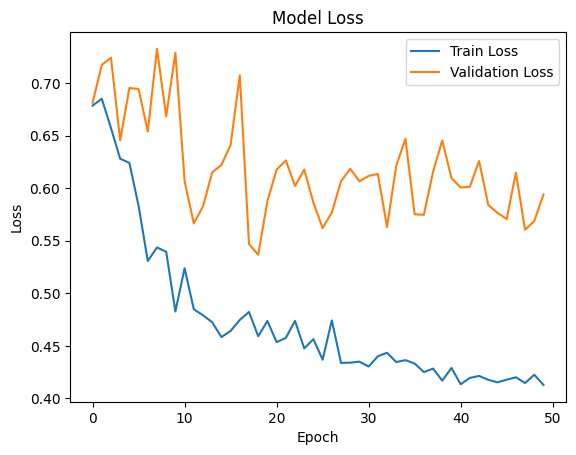

In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Set paths
image_folder = r'C:\Users\magal.DESKTOP-HG9G00M\hello snitch\distanceofplot\dataset\images'  # safer slashes
mask_folder = r'C:\Users\magal.DESKTOP-HG9G00M\hello snitch\distanceofplot\dataset\masks'

# Parameters
img_size = (256, 256)

# Load and resize images
def load_images_from_folder(folder, color_mode='rgb'):
    images = []
    for filename in sorted(os.listdir(folder)):
        img = load_img(os.path.join(folder, filename), target_size=img_size, color_mode=color_mode)
        img = img_to_array(img) / 255.0
        images.append(img)
    return np.array(images)

# Load images and masks
X = load_images_from_folder(image_folder, color_mode='rgb')
y = load_images_from_folder(mask_folder, color_mode='grayscale')

# Threshold masks to binary
y = (y > 0.5).astype(np.float32)

print("Images shape:", X.shape)
print("Masks shape:", y.shape)

# Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    UpSampling2D(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D(),
    Conv2D(1, (1, 1), activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=2)

# Save model
model.save('segmentation_model.h5')

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
